## Plots
first, change all:
-  ',' to ', '  
- '"' to ' ' 
in csv using text editor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
results = pd.read_csv("evaluate.mse.csv")
results.rename({'Unnamed: 0': 'layer'}, axis='columns', inplace=True)
results

,layer,name,bit,shape,mse_before,mse_after,acc_train
0,0,conv1,8,"torch.Size([64, 3, 7, 7])",0.555403,0.096180,0.096180
1,1,layer1.0.conv1,8,"torch.Size([64, 64, 1, 1])",0.838883,0.192848,0.096010
2,2,layer1.0.conv2,8,"torch.Size([64, 64, 3, 3])",4.414832,0.199052,0.095980
3,3,layer1.0.conv3,8,"torch.Size([256, 64, 1, 1])",0.109269,0.042559,0.095700
4,4,layer1.0.downsample.0,8,"torch.Size([256, 64, 1, 1])",0.198451,0.039957,0.095690
5,5,layer1.1.conv1,8,"torch.Size([64, 256, 1, 1])",1.596843,0.162663,0.095640
6,6,layer1.1.conv2,8,"torch.Size([64, 64, 3, 3])",4.090534,0.211059,0.095500
7,7,layer1.1.conv3,8,"torch.Size([256, 64, 1, 1])",0.123771,0.044951,0.095480
8,8,layer1.2.conv1,8,"torch.Size([64, 256, 1, 1])",1.854120,0.139434,0.095450
9,9,layer1.2.conv2,8,"torch.Size([64, 64, 3, 3])",3.693260,0.134170,0.095441


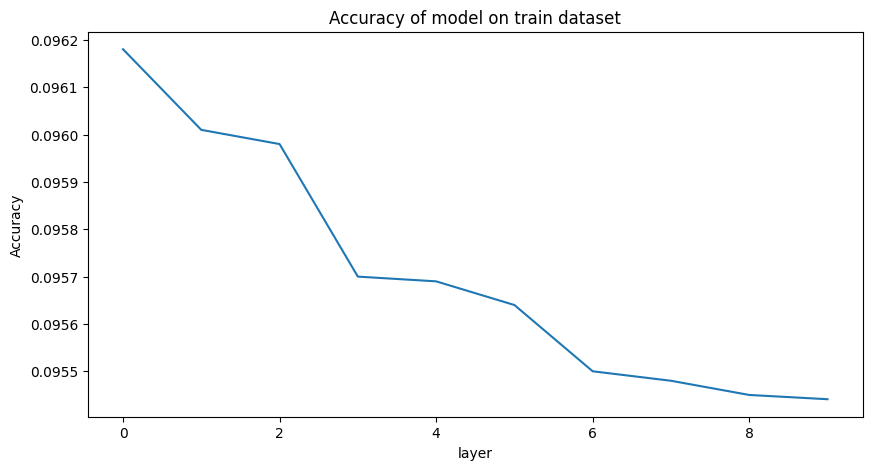

In [7]:
plt.plot(results['layer'], results['acc_train'])
plt.title('Accuracy of model on train dataset')
plt.xlabel('layer')
plt.ylabel('Accuracy')
plt.show()

In [4]:
mse = {
    'mse_before': round(results['mse_before'],2),
    'mse_after': round(results['mse_after'],2)
}

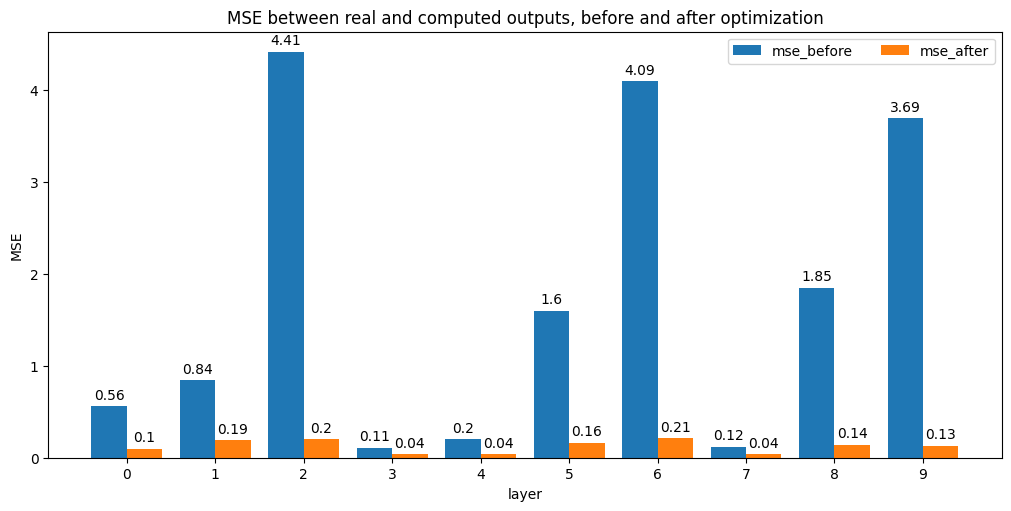

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
x = np.arange(len(results['layer']))
width = 0.4
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('MSE')
ax.set_xlabel('layer')
ax.set_title('MSE between real and computed outputs, before and after optimization')
ax.set_xticks(x + 0.5*width, results['layer'])
ax.legend(loc='upper right', ncols=2)

plt.show()

## Size of model

In [38]:
results['shape']

0      torch.Size([64, 3, 7, 7])
1     torch.Size([64, 64, 1, 1])
2     torch.Size([64, 64, 3, 3])
3    torch.Size([256, 64, 1, 1])
4    torch.Size([256, 64, 1, 1])
5    torch.Size([64, 256, 1, 1])
6     torch.Size([64, 64, 3, 3])
7    torch.Size([256, 64, 1, 1])
8    torch.Size([64, 256, 1, 1])
9     torch.Size([64, 64, 3, 3])
Name: shape, dtype: object

In [39]:
size = 1
for string in results['shape']:
    split = string.split(sep=",")
    for fragment in split:
        number=float(re.sub('\D', '', fragment))
        size*=number

In [40]:
size32 = size*32
size8 = size*8

<function matplotlib.pyplot.show(close=None, block=None)>

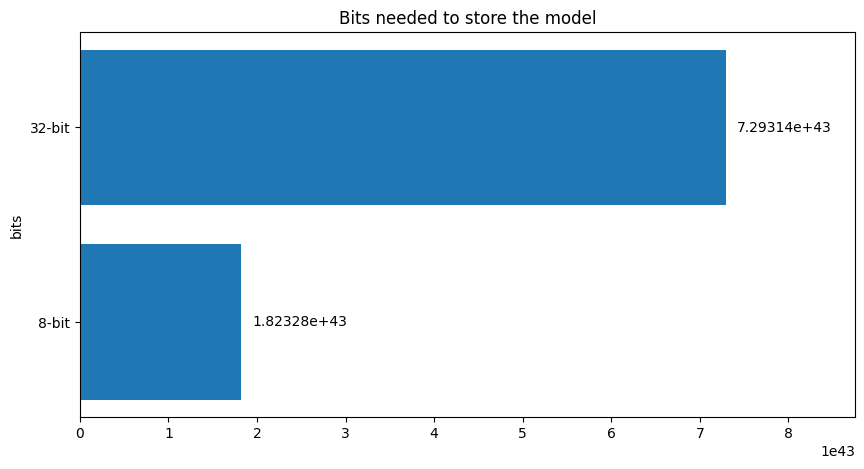

In [57]:
x = ['32-bit', '8-bit']
y = [size32, size8]
label = [str(size32), str(size8)]

fig, ax = plt.subplots()
bar_container = ax.barh(x,y,label=label)
ax.invert_yaxis() 
ax.set(ylabel='bits', title='Bits needed to store the model')
ax.bar_label(bar_container, padding=8)
ax.set_xlim(right=size32*1.2)
plt.show

In [44]:
str(size32)

'7.293135857269706e+43'